### Module Imports

We will create a system using Ubermag. Then minimise the energy using two different drivers. One will be oommfc, a well establised energy minimisation drive based on LLG equation. Then we will minimise the  energy with the MCDriver() based on non-perturbative approach.
Ubermag block point system
Code...
OOMMFC bloch point 
Code ….
MCDiver bloch point
Code....
As we can see we arrive at the same reults and the API structure is very similar.


In [2]:
#Ubermag imports
import discretisedfield as df # discretisedfield is a part of the Ubermag package
import micromagneticmodel as mm # micromagneticmodel is a part of the Ubermag package
import oommfc as oc  # oommfc is a part of the Ubermag package

# McPy import
from mcpy.system import MCDriver


### Defining the system

In [3]:
Ms = 3.84e5 # Saturated magnetisation (A/m)
A = 8.78e-12 # Exchange energy constant (J/m)
d = 150e-9 # Diameter of the nanodisc (nm)
hb = 20e-9 # Bottom thickness of the nanodisc (nm)
ht = 10e-9 # Top thickness of the nanodisc (nm)

# Discretisation of the simulation cell (nm)
cell = (5.0e-9, 5.0e-9, 2.5e-9) 

# DMI constant of different regions(J/m**2)
D_bloch = {'r1': -1.58e-3, 'r2': 1.58e-3, "r1:r2": 1.58e-9} 

#Locations(P1 and P2) of the subregions of the nanodisc.
subregions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)), 'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))} 


p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)

# Creating Mesh for the above subregions based on discretisation cell
mesh = df.Mesh(p1=p1, p2=p2, cell=cell, subregions=subregions) 

# Function to define the saturation magnetisation of the nanodisc
def Ms_fun(point):
    x, y, z = point
    if x**2 + y**2 < (d/2)**2:
        return Ms
    else:
        return 0

# Creating a micromagneticmodel object with file name 'Energy_validation'
system = mm.System(name='Energy_validation')

#Adding different energies/interactions to the system
system.energy = mm.Exchange(A=A) + mm.DMI(D=D_bloch, crystalclass='T') + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) + mm.Zeeman(H=(0, 0, 2e5))

# Creating a system with the above mesh and Ms function
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

#Printing the systems energy terms
system.energy

Exchange(A=8.78e-12) + DMI(D={'r1': -0.00158, 'r2': 0.00158, 'r1:r2': 1.58e-09}, crystalclass='T') + UniaxialAnisotropy(K=510000.0, u=(0, 0, 1)) + Zeeman(H=(0, 0, 200000.0))

### Visualizing the system

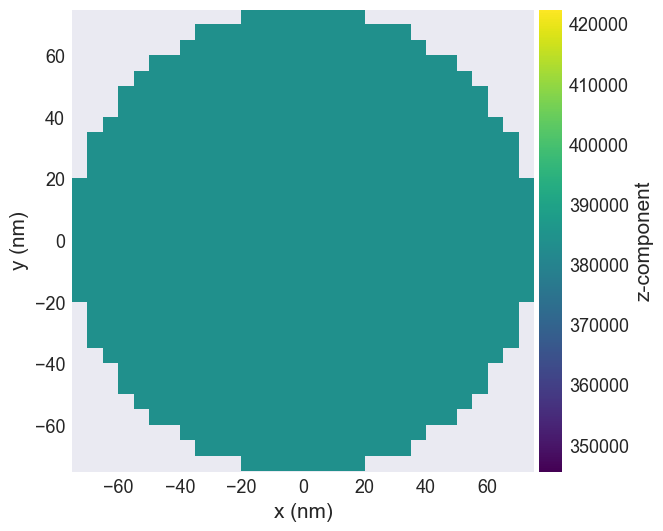

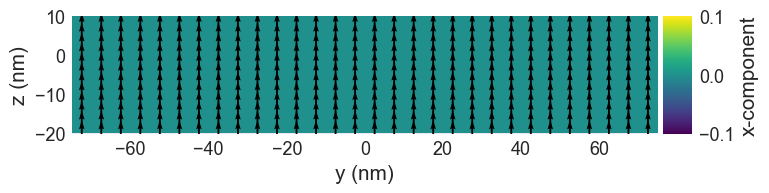

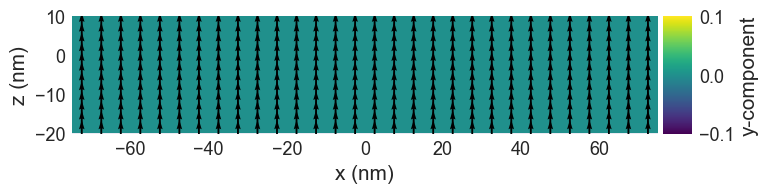

In [5]:
system.m.plane('z').mpl(); # Z component of the system
system.m.plane('x').mpl(); # X component of the system
system.m.plane('y').mpl(); # Y component of the system

MCDriver

In [6]:
mc = MCDriver(system=system, energy_calc='numba')

zeeman.H found.
exchange.A found.
dmi.crystalclass found.
Anisotropy found.
demag.N not found.
